# <u>M</u>edical <u>D</u>eep <u>L</u>earning
## Exercise 0: Introduction to pytorch
### -- Ungraded sheet --

This exercise sheet provides a hands-on introduction to the pytorch framework. This sheet is not being graded yet. However, we strongly recommend to go over this tutorial completing all tasks as it reflects fundamental skills being assumed in subsequent exercises.
If you have any questions, please ask your tutors or use our forum in Moodle. 

**Have fun with pytorch and deep learning!**

We start with some relevant includes. If this should fail please install pytorch using "pip install torch". In colab this should not be required.

In [1]:
import torch
import numpy as np

# Pytorch
In this exercise we will introduce the open source machine learning framework [PyTorch](https://pytorch.org/) with its most important key features like automatic differentiation and GPU/Cuda support. However, this tutorial is just briefly, so it is recommended to read some more tutorials on your own like the [official one](https://pytorch.org/tutorials/beginner/basics/intro.html), that we will reference during this exercise. Besides its tutorials, Pytorch comes with a great [documentation](https://pytorch.org/docs/stable/index.html), that gives a good overview and detailed explanation including some minimal examples of its functionalities.
## Tensor basic
Pytorch's core datatype is the tensor, which is basically just another name for a multidimensional array. See [this](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html) for a more detailed tutorial. A tensor can be initialized from different types of sources. Let's start with a simple list:

In [2]:
t = torch.tensor([[1, 2], [2, 3]])
print(t, t.dtype)

tensor([[1, 2],
        [2, 3]]) torch.int64


As you can see the tensor data type is automatically inferred from the source. Try it out by changing one value to a float with a simple dot (2 → 2.).

Tensors have a lot of attributes, that functions as the API for the functionalities of pytorch. For now let us just focus of the most important one:
You already know the datatype attribute `dtype`

In [3]:
t.dtype

torch.int64

If you like to transform a tensor for example cast it back into an `Int64`, you can to this with its `to()` function.

In [4]:
t.to(torch.int64).dtype

torch.int64

This function could also be used to transfer a tensor to the GPU. This will change the `device` attribute of the tensor and will transfer it to the specified device. For that, make sure, that you choose the appropriated runtime environment in Colab (Runtime → Change runtime type → Hardware accelerator → GPU).

In [5]:
t.device

device(type='cpu')

The default device is the CPU. Now let's move it to the GPU.

In [6]:
t.to('cuda').device

device(type='cuda', index=0)

In [7]:
t.cuda().device

device(type='cuda', index=0)

As you see, there is also a shortcut with the `cuda()` function. However, using the `to()` function has the advantage of being more adaptive in the case, where no GPU is available:

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
t.to(device).device

device(type='cuda', index=0)

For an interaction between each other, both tensors have to be on the same device.
The last attribute, which we focus on, holds the information of the dimensionality or `shape` of the tensor (with `size` being analogous).

In [9]:
print(t.shape, t.size())
print(t.shape[1], t.size(1))

torch.Size([2, 2]) torch.Size([2, 2])
2 2


To initialize a tensor you could also use the function `ones`, `zeros` or `rand`. With the `*_like` version it is possible to copy the data type and shape of another tensor.

In [10]:
t = torch.rand(2, 2)
print(t)
t_zeros = torch.zeros_like(t)
print(t_zeros)

tensor([[0.4767, 0.4376],
        [0.2040, 0.7171]])
tensor([[0., 0.],
        [0., 0.]])


The last possible source for the tensor's data is a numpy array.

In [11]:
n = np.arange(5)
print(n)
t = torch.from_numpy(n)
print(t)

[0 1 2 3 4]
tensor([0, 1, 2, 3, 4])


In fact, a tensor and numpy nd-array are so similar that they can often share their underlying memory, so it is very easy to convert between them. This numpy bridge makes Pytorch very compatible with other favorite open source libraries like sklearn, opencv, open3d, pandas...

In [12]:
n_t = t.numpy()
type(n_t)

numpy.ndarray

Proving the shared memory:

In [13]:
t.add_(1)
print(t, n)

tensor([1, 2, 3, 4, 5]) [1 2 3 4 5]


So all in all it is a good starting point to think about Pytorch as a numpy wrapper with an automatic differentiation and GPU support. The Pytorch tensor API is thus very similar to the numpy and comes also with the powerful functionality of [advanced indexing](https://numpy.org/devdocs/user/basics.indexing.html) and [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). It is highly recommended getting familiar with them, because they become very handy at a variety of tasks!

### tensor playground
Now it is your turn! Create the following tensors $t$ with the proposed methods and get familiar with them by reading their documentation.

Create $t$ using `ones`, `zeros` and indexing
$$
t=\left[
    \begin{array}{cc}
    0 & 0 & 0 & 0\\
    1 & 4 & 8 & 12\\
    1 & 1 & 7 & 6\\
    1 & 1 & 4 & 9\\
    \end{array}
\right]
$$

In [14]:
# TODO
t = torch.cat((torch.zeros(1,4), torch.ones(3,4)), 0)
t[1, 1] = 4
t[1, 2] = 8
t[1, 3] = 12
t[2, 2] = 7
t[2, 3] = 6
t[3, 2] = 4
t[3, 3] = 9
print(t)

tensor([[ 0.,  0.,  0.,  0.],
        [ 1.,  4.,  8., 12.],
        [ 1.,  1.,  7.,  6.],
        [ 1.,  1.,  4.,  9.]])


Create $t$ by broadcasting of two 1d-tensors, `unsqueeze`, `arange`, `ones`
$$
t=\left[
    \begin{array}{cc}
    1 & 2 & 3 & 4\\
    1 & 2 & 3 & 4\\
    1 & 2 & 3 & 4\\
    1 & 2 & 3 & 4\\
    \end{array}
\right]
$$

In [15]:
# TODO
t = torch.ones(4,4)
x = torch.arange(0, 4)
#x = torch.unsqueeze(x, 1)
t = t + x
print(t)

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]])


Create the same $t$ but this time only use `arange` and `repeat`. Please also understand the difference to `expand`.

In [16]:
# TODO
t = torch.arange(1, 5)
t = t.repeat(4, 1)
print(t)

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]])


Create $t$ using `zeros`, `arange` and `view`
$$
t=\left[
    \begin{array}{cc}
    0 & 1 & 2 & 0\\
    3 & 4 & 5 & 0\\
    0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0\\
    \end{array}
\right]
$$

In [17]:
# TODO
s = torch.arange(0, 6)
s = s.view(2, 3)
t = torch.zeros(4,4)
t[:2,:3] = s
print(t)

tensor([[0., 1., 2., 0.],
        [3., 4., 5., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


Create $t$ using `zeros` and modify it inplace with `scatter_add_`. Therefor create a value tensor $v$ as source with `ones_like` and an index tensor $i$
$$
t=\left[
    \begin{array}{cc}
    0 & 1 & 0 & 1\\
    0 & 1 & 1 & 0\\
    1 & 0 & 0 & 1\\
    0 & 0 & 1 & 1\\
    \end{array}
\right]
$$

In [18]:
# TODO
v = torch.ones((4, 2))
i = torch.tensor([[1, 3],[1, 2],[0, 3],[2, 3]])
t = torch.zeros(4, 4, dtype=v.dtype).scatter_add_(1, i, v)
print(t)

tensor([[0., 1., 0., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.],
        [0., 0., 1., 1.]])


### Autograd
In this section we will investigate into one of the most important features of Pytorch: automatic differentiation. This enables the stochastic gradient descend (SGD) during the training of neural networks by building a dynamic graph (see the [official tutorial](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) for more details). To start the backpropagation you just simply apply the tensor function `backward` on the tensor you want to calculate the gradient with respect to. The `requires_grad` flags of all tensors, that you want to obtain the gradient for, have to be set. After the backpropagation the gradients of the tensors will be stored in the attribute `grad`.

To get a better intuition, we will calculate the derivatives of a minimal example by hand and get a feeling why the chain rule is so important for SGD.

In [19]:
x = torch.tensor([5.], requires_grad=True)
f = x**3
f.backward()

df_dx = 3*x**2
print(x.grad, x.grad == df_dx)

tensor([75.]) tensor([True])


If you are struggling at all, it is a good idea to get a cup of tea, a pen and paper and watch [this](https://www.youtube.com/watch?v=tIeHLnjs5U8) very detailed explanation step-by-step.

Your task is now to calculate and check the derivative of $w_1, b_1, w_2, b_2$  in the same manner as for the $x$ in the cell above. We have a (very) small neural network, that could be expressed by following equations:
$$
\begin{aligned}
a_1 &= \sigma(x \cdot w_1+b_1) \\
z_2 &= a_1 \cdot w_2+b_2\\
c &= \mathcal{L}(z_2, y)
\end{aligned}
$$
The chain rule becomes very handy here!

In [20]:
# Given
from torch.nn import LeakyReLU, ReLU
x = torch.tensor([5])
y = 1
sigma = LeakyReLU(negative_slope=0.01) # ReLU()

# first layer
w_1 = torch.tensor([-1.], requires_grad=True)
b_1 = torch.tensor([3.], requires_grad=True)
z_1 = x*w_1+b_1
a_1 = sigma(z_1)

# second layer
w_2 = torch.tensor([2.], requires_grad=True)
b_2 = torch.tensor([9.], requires_grad=True)
z_2 = a_1*w_2+b_2

# loss function
c = (y-z_2)**2
c.backward()

# TO-DO
dc_dz_2 = 2*(1-z_2)*-1
dc_dw_2 = dc_dz_2 * a_1
dc_db_2 = dc_dz_2 * 1

dc_da_1 = dc_dz_2 * w_2
dc_dsigma = dc_da_1 * 0.01
dc_dw_1 = dc_dsigma * x
dc_db_1 = dc_dsigma * 1

# Given
print(w_2.grad, w_2.grad == dc_dw_2)
print(b_2.grad, b_2.grad == dc_db_2)

print(w_1.grad, w_1.grad == dc_dw_1)
print(b_1.grad, b_1.grad == dc_db_1)


tensor([-0.3184]) tensor([True])
tensor([15.9200]) tensor([True])
tensor([1.5920]) tensor([True])
tensor([0.3184]) tensor([True])


What happens if you change sigma to the ReLU function (hint: check the magnitude of the gradient)? How does the leaky ReLU function is superior in this specific case? Why are dead neurons a problem during training?

## CNN
In this section we will build a little classification CNN. Pytorch already has every common layer type implemented in the `torch.nn` library. All this implementation share the same base class `nn.Module` and a neural network is just a sequence of such modules. All classes that inherit from `nn.Module` have to implement the `forward` function, which determine, how the incoming data are handled by the module. Modules can also have nested modules. In fact, a neural network itself is just a `nn.Module`. Just read the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) and the [official tutorial](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html) to get a better intuition for that very important base class.

### ConvBlock
Now we want to implement a convolutional building block, that uses two convolutional layers to halve the spatial dimensions and double the channel to project the information into a feature space. We will later use this building block for the classification CNN.
Complete the `ConvBlock` class by adding the layers to the [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html), that function as a container. The sequential should hold two layer groups, each group consisting of
+ `nn.Conv2d` with a kernel size of 3, a padding of 1 and a disabled bias
+ `nn.BatchNorm2d`
+ `nn.LeakyReLU`

The first group should double the feature channel (`out_c`) while the second group will keep this number of output channels. Also add a `nn.MaxPool2d` with a kernel size of 2 after the two layer groups to half the spatial dimension of the feature maps.

In [34]:
# Given
from torch import nn

class ConvBlock(nn.Module):
    def __init__(self, in_c, out_c):
        super(ConvBlock, self).__init__()
        self.layer = nn.Sequential(
            # TODO
            # 1st layer group
            nn.Conv2d(in_channels=in_c, out_channels=out_c, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_c),
            nn.LeakyReLU(),

            # 2nd layer group
            nn.Conv2d(in_channels=out_c, out_channels=out_c, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_c),
            nn.LeakyReLU(),

            # max pooling
            nn.MaxPool2d(2)
        )

    # Given
    def forward(self, x):
        return self.layer(x)


## Pneumonia classification in x-ray torso
Now let's build the classification CNN. We will use some `ConvBlock` to build an encoder (convolutional backbone) for the feature extraction. Write a `nn.Module` with the name `CNN`, that have two `nn.sequential`. The first one should be named `encoder` and contains three `ConvBlock`
1. ConvBlock(in_c=1, out_c=8)
2. ConvBlock(in_c=8, out_c=16)
3. ConvBlock(in_c=16, out_c=32)

To obtain a 32-dim feature vector from the 32 feature maps of the convolutional encoder, we just reduce them by taking the average. Thus, you should add a `nn.AdaptiveAvgPool2d(output_size=1)` as an attribute `avg_pool`.
The second sequential should be named `classifier` and implement two fully connected layers (`nn.Linear`) to separate the feature space of the 32dim-feature vector into the two class decision regions.
1. `nn.Linear` taking 32 feature and transform them (without a bias) into 8
2. `nn.BatchNorm1d`
3. `nn.LeakyReLU`
4. `nn.Linear` taking the 8 features and separate them into the two class decision regions (a bias is necessary here!)

Do not forget the `forward` function this time; pay attention to flatten the result of the `nn.AdaptiveAvgPool2d` for the `classifier` using `torch.flatten` with `start_dim=1`!

In [35]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            # TODO
            ConvBlock(1, 8),
            ConvBlock(8, 16),
            ConvBlock(16, 32),
        )

        self.avg_pool = nn.AdaptiveAvgPool2d(1)

        self.classifier = nn.Sequential(
            nn.Linear(32, 8, bias=False),
            nn.BatchNorm1d(8),
            nn.LeakyReLU(),
            nn.Linear(8, 2)
        )

    def forward(self, x):
        # TODO
        x = self.encoder(x)
        x = self.avg_pool(x)
        x = self.classifier(torch.flatten(x, start_dim=1))
        
        return x

All `nn.Module` has a pretty string representation as a recursive list of all modules with their parameters.

In [36]:
print(CNN())

CNN(
  (encoder): Sequential(
    (0): ConvBlock(
      (layer): Sequential(
        (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): LeakyReLU(negative_slope=0.01)
        (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (1): ConvBlock(
      (layer): Sequential(
        (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

However, this representation lacks the calculation of the spatial dimension and parameter count for each layer in respect to the dimension of the input. For that and a storage approximation for your model you could use the `summary` function of the (extern) `torchsummary` library. `summary` need a model instance and also the spatial dimension (without the batch dimension). Your CNN should contain 18 442 learnable parameters.

In [37]:
from torchsummary import summary

summary(CNN().to(device), (1, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 128, 128]              72
       BatchNorm2d-2          [-1, 8, 128, 128]              16
         LeakyReLU-3          [-1, 8, 128, 128]               0
            Conv2d-4          [-1, 8, 128, 128]             576
       BatchNorm2d-5          [-1, 8, 128, 128]              16
         LeakyReLU-6          [-1, 8, 128, 128]               0
         MaxPool2d-7            [-1, 8, 64, 64]               0
         ConvBlock-8            [-1, 8, 64, 64]               0
            Conv2d-9           [-1, 16, 64, 64]           1,152
      BatchNorm2d-10           [-1, 16, 64, 64]              32
        LeakyReLU-11           [-1, 16, 64, 64]               0
           Conv2d-12           [-1, 16, 64, 64]           2,304
      BatchNorm2d-13           [-1, 16, 64, 64]              32
        LeakyReLU-14           [-1, 16,

### Dataset
Now let's have a look at our dataset. Pytorch provides two base class to deal with the loading, structuring and transforming data: `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. Here, the dataset is already implemented for you, but it is recommended to have a look at the [official tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) anyway.

In [38]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=1d62a52c117999ff0fc7580e39c24da2c486cc9fc674448ddd166469c363c336
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [39]:
import wget
from os.path import exists
from torch.utils.data import Dataset


class PneumoniaXRayDataset(Dataset):
    def __init__(self, mode: str):
        super(PneumoniaXRayDataset, self).__init__()
        # load data
        data_file = 'pneumonia_detection_data_img.pth'
        label_file = 'pneumonia_detection_data_label.pth'

        if not exists(data_file):
            data_file = wget.download(
                'https://cloud.imi.uni-luebeck.de/s/7Re8XdKCxpTZDk2/download/pneumonia_detection_data_img.pth')
        if not exists(label_file):
            label_file = wget.download(
                'https://cloud.imi.uni-luebeck.de/s/XgccQesxFeT9EqE/download/pneumonia_detection_data_label.pth')

        img = torch.load(data_file)
        lbl = torch.load(label_file)

        # store statistic of whole dataset
        self.num_data = len(lbl)
        self.num_lbl = torch.bincount(lbl)

        torch.manual_seed(42)
        rand_idx = torch.randperm(len(lbl))

        # split data
        if mode == 'train':
            self.idx = rand_idx[:4500]
        elif mode == 'val':
            self.idx = rand_idx[4500:5000]
        elif mode == 'test':
            self.idx = rand_idx[5000:]
        else:
            raise ValueError(f'unknown mode: {mode}. Valid modes are train, val and test')

        self.img = img[self.idx]
        self.lbl = lbl[self.idx]

    def __len__(self):
        return len(self.lbl)

    def __getitem__(self, idx):
        return self.img[idx], self.lbl[idx]

Let have a look at some training data with their ground truth:

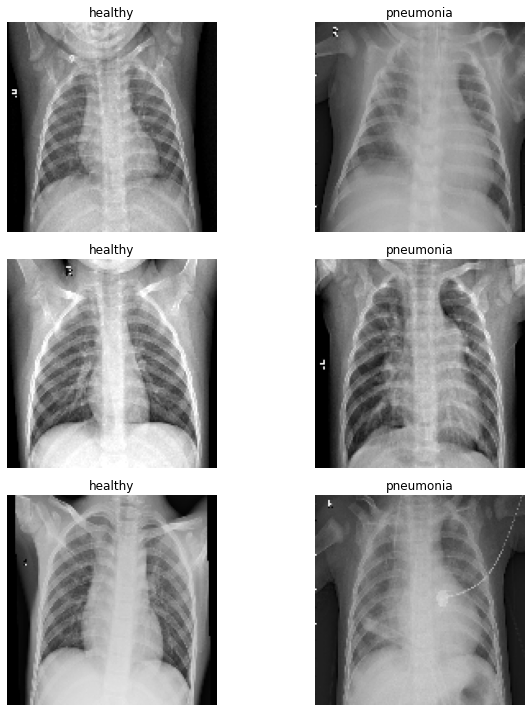

In [40]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
ds = PneumoniaXRayDataset('train')

for i, ax in enumerate(axs):
    ax[0].imshow(ds.img[ds.lbl == 0][i].squeeze(), cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('healthy')

    ax[1].imshow(ds.img[ds.lbl == 1][i].squeeze(), cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('pneumonia')

plt.tight_layout()
plt.show()

### Pytorch data tensor structure
To understand the data structure of pytorch data tensors, we print the shape of the underlying data tensor of `PneumoniaXRayDataset(mode='train')`

In [41]:
print(ds.img.shape)

torch.Size([4500, 1, 128, 128])


A data tensor has the shape $[N, C, H, W]$ for 2d data, where $N$ describes the amount of data instances, $C$ its feature dimension (here grayscale images → 1 ) and $H$ and $W$ the height and width as the spatial dimensions.

## Training
In this section we will finally train the CNN for the pneumonia classification. But before that, we have to check, if the classes of the dataset are balanced:

In [42]:
label_count = ds.num_lbl
del ds

label_count

tensor([1583, 3990])

The one class is heavily over-represented and thus would lead to a bias during training. Because the probability or prior of the one class is much higher, the CNN would lean to predict this class to fit the dataset better. To compensate this, we can weight the loss of each class $\omega_i$ individually with its squared inverse frequency.
First estimate the classes prior $P_{\omega_i}$ by dividing `label_count` with its sum.

In [47]:
# TODO

P = label_count/label_count.sum()
print(P)

tensor([0.2840, 0.7160])


Then calculate the weight vector $w$ using following formula:
$$ w_{\omega_i} = \sqrt{(P_{\omega_i})^{-1}}$$

In [48]:
# TODO

w = torch.sqrt(torch.pow(P, -1))
w

tensor([1.8763, 1.1818])

If you print $w$ you see that $\omega_1$ has a much higher weight than $\omega_2$ and thus will compensate its bad representation in the dataset.
Now let's write the training routine, you can orientate again on the [official tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html).
First we need two `Dataloader` that maintain the train and the validation data. The training one should get a `PneumoniaXRayDataset` instance in the mode `train`, use 32 for the batch size. It should drop the last incomplete batch and shuffle the dataset after every epoch.
The one for validation should get a dataset instance in the mode `val` and a batch size of 64. All the other parameters should be set to default.

In [49]:
from torch.utils.data import DataLoader
from tqdm import trange, tqdm

# TODO
train_dl = DataLoader(dataset=PneumoniaXRayDataset(mode='train'), 
                      batch_size=32, shuffle=True, drop_last=True)
val_dl = DataLoader(dataset=PneumoniaXRayDataset(mode='val'),
                      batch_size=64, drop_last=False)

We will train for 30 epochs, which is an important hyperparameter and should be saved to a variable.
It is important to validate the training process. For that initialize four tensors with zeros to store the training and validation loss and accuracy of every epoch.

In [50]:
# TODO
num_epoch = 30
train_loss = torch.zeros(num_epoch)
train_acc = torch.zeros(num_epoch)

val_loss = torch.zeros(num_epoch)
val_acc = torch.zeros(num_epoch)

Next instantiate the CNN and move it to the GPU. We chose `torch.optim.Adam` for an optimizer and register the model parameter on it via the CNN's `parameters()` function. To measure the error of its prediction on the training data, we chose the `nn.CrossEntropyLoss` with $w$ as its weights ($w$ has to be on the same device as the CNN).

In [51]:
# TODO
mdl = CNN().to(device) # CNN
optimizer = torch.optim.Adam(mdl.parameters()) # Adam 
criterion = nn.CrossEntropyLoss(weight=w.to(device)) # Cross entropy

Now we are in the training loop. Complete the training and validation section. Do not forget the [tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html) for an example.

For the training section:
+ move `img` and `lbl` to the same device as the CNN/model
+ propagate the `img` to the model and save the raw prediction (aka logits)
+ measure the error with the ground truth `lbl` using your instance of the `nn.CrossEntropyLoss`
+ set the gradient of the optimizer to zero with `zero_grad`
+ backpropagate the error with `backward`
+ optimize the model's parameter calling the `step` function on the optimizer
+ save the training progress in the two of the four with zero initialized tensors. Use the `epoch` iterator for indexing and copy them to the CPU space with `cpu()`
    + for the loss also `detach` is necessary to prevent storing the autograd graph
    + to get labels from the prediction use `torch.argmax` over the correct dimension, compare the resulting index with the labels and count the correct predictions using the sum over the boolean tensor

For the validation section:
+ move `img` and `lbl` to the same device as the CNN/model
+ propagate the `img` to the model and save the raw prediction (aka logits)
    + use the context `torch.no_grad()` here to prevent teh tracking of the gradients
+ measure the error with the ground truth `lbl` using your instance of the `nn.CrossEntropyLoss`
+ save the training progress in the two of the four with zero initialized tensors. Use the `epoch` iterator for indexing and copy them to the CPU space with `cpu()`
    + to get labels from the prediction use `torch.argmax` over the correct dimension, compare the resulting index with the labels and count the correct predictions using the sum over the boolean tensor

In [52]:
for epoch in trange(num_epoch, unit='epochs'):
    mdl.train()
    for img, lbl in train_dl:
        # TODO
        img = img.to(device)
        lbl = lbl.to(device)

        logits = mdl(img)
        loss = criterion(logits, lbl)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss[epoch] += loss.detach().cpu()
        train_acc[epoch] += torch.sum(torch.argmax(logits, dim=1) == lbl).cpu()

    mdl.eval()
    for img, lbl in val_dl:
        # TODO
        img = img.to(device)
        lbl = lbl.to(device)

        with torch.no_grad():
            logits = mdl(img)
        loss = criterion(logits, lbl)

        val_loss[epoch] += loss.cpu()
        val_acc[epoch] += torch.sum(torch.argmax(logits, dim=1) == lbl).cpu()
        
train_loss /= len(train_dl) * train_dl.batch_size
train_acc /= len(train_dl) * train_dl.batch_size

val_loss /= len(val_dl.dataset)
val_acc /= len(val_dl.dataset)

100%|██████████| 30/30 [01:40<00:00,  3.34s/epochs]


Check and plot the progress of the training, which will take about 4 minutes, with the provided function below (just call it on you four tensors). If you like, you could experiment with a learn-rate scheduler like [this](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ExponentialLR.html#torch.optim.lr_scheduler.ExponentialLR) to stabilize the training and improve the results.

In [53]:
def plot_training_progress(train_loss: torch.Tensor, train_acc: torch.Tensor, val_loss: torch.Tensor, val_acc: torch.Tensor):
    labels = ['training', 'validation']
    fig, axs = plt.subplots(2, 1, sharex=True)

    axs[0].plot(torch.arange(len(train_loss), device='cpu'), train_loss.cpu(), val_loss.cpu())
    axs[0].legend(labels)
    axs[0].set_title('Loss')
    axs[0].set_ylabel('crossentropy loss')

    axs[1].plot(torch.arange(len(train_acc), device='cpu'), train_acc.cpu(), val_acc.cpu())
    axs[1].legend(labels)
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('epoch')

    plt.show()

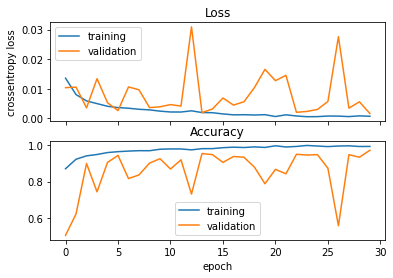

In [54]:
# TODO
plot_training_progress(train_loss, train_acc, val_loss, val_acc)

Let's test the model on unseen data, which are not used at all (no validation during training or hyperparameter optimization), with the provided function below.

In [55]:
from sklearn import metrics
from prettytable import PrettyTable

def evaluation_metrics(y: torch.Tensor, y_hat: torch.Tensor):
    """

    :param y: ground truth
    :param y_hat: prediction
    :return:
    """
    assert len(y) == len(y_hat)
    assert len(y.shape) == len(y_hat.shape) == 1

    tab = PrettyTable(field_names=['metric', 'value'])
    tab.add_row(['accuracy', metrics.accuracy_score(y, y_hat)])
    tab.add_row(['precision', metrics.precision_score(y, y_hat)])
    tab.add_row(['recall', metrics.recall_score(y, y_hat)])
    tab.add_row(['f1', metrics.f1_score(y, y_hat)])
    print(tab)

    disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y, y_hat), display_labels=['healthy', 'pneumonia'])
    disp.plot()
    plt.show()

To do that, we need the prediction of the model on the test data. Therefor, we need a test datalaoder with the very same parameters like the validation one (make especially sure to unset `shuffle`!), except the mode of the dataset has to be `test`. Set your model in the evaluation mode with `eval()` and instantiate an emtpy list `y_hat` for the model's prediction. Copy the validation section from the training loop (you do not need the lossfunction etc.) and replace the dataloader with the one for testing. In the loop: after obtaining the model's prediction via `argmax` convert them into a list with `tolist` and extend them to `y_hat`.

Call `evaluation_metrics` with the labels of the dataset and `y_hat` converted to a tensor.

100%|██████████| 9/9 [00:00<00:00, 82.91batch/s]


+-----------+--------------------+
|   metric  |       value        |
+-----------+--------------------+
|  accuracy | 0.9633507853403142 |
| precision | 0.9802955665024631 |
|   recall  | 0.9683698296836983 |
|     f1    | 0.974296205630355  |
+-----------+--------------------+


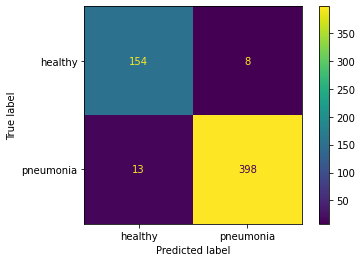

In [56]:
# TODO
test_dl = DataLoader(dataset=PneumoniaXRayDataset(mode='test'), batch_size=64, shuffle=False, drop_last=False)

mdl.eval()
y_hat = []
for img, lbl in tqdm(test_dl, unit='batch'):
    img = img.to(device)
    lbl = lbl.to(device)

    with torch.no_grad():
        logits = mdl(img)
    y_hat.extend(torch.argmax(logits, dim=1).cpu().tolist())
    
y_hat = torch.tensor(y_hat)
evaluation_metrics(test_dl.dataset.lbl, y_hat)

If your training was successful, your CNN should yield a f1-score about 0.96.